### Saldías et al. Figure 03 

In [1]:
import cmocean as cmo
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gspec
import matplotlib.patches as patches
from netCDF4 import Dataset
import numpy as np
import xarray as xr

%matplotlib inline
%matplotlib inline

In [2]:
def plot_rho_AS(ax, z, y, rho, rho_min=27.4, rho_max=28.3):
    '''y : y-section to plot, shape is (yslice, xi)
       z : z-section to plot, shape is (nt, zslice, yslice, xi)
       rho: y-z section of density, shape is (nt, zslice, yslice, xi)'''
    Y = np.expand_dims(y,axis=0)
    Z = np.squeeze(z)
    Y = Y + np.zeros_like(Z)
    cn = ax.contour(((Y/1E3-400)), Z, rho, levels=np.linspace(rho_min, rho_max, 14), 
                    alpha=0.2, colors='k')
    ax.contour(((Y/1E3-400)), Z, rho, levels=[27.6, 27.8, 28.0, 28.2], colors='black')
    return(ax, cn)

def plot_v_AS(ax, z, y, v, v_min=-0.15, v_max=0.15, cmap=cmo.cm.balance):
    '''y : y-section to plot, shape is (yslice, xi)
       z : z-section to plot, shape is (nt, zslice, yslice, xi)
       v: y-z section of alongshore vel, shape is (nt, zslice, yslice, xi)'''
    ax.set_facecolor('tan')
    Y = np.expand_dims(y,axis=0)
    Z = np.squeeze(z)
    Y = Y + np.zeros_like(Z)
    levels = np.linspace(v_min,v_max, 25)
    pc2 = ax.contourf(((Y/1E3-400)), Z, v, levels=levels, cmap=cmap, vmin=v_min, vmax=v_max) 
    return(ax, pc2)

In [3]:
y1 = 139 # -30 km canyon axis
y2 = 439 # +30 km canyon axix 
y_axis = 289 # canyon axis
x1 = 239-1 # -10 km
x2 = 288 # last x index

t1 = 90
t2 = 195
t_low = 140
t_high = 157

col1 = '#254441' #'#23022e'
col2 = '#43AA8B' #'#573280'
col3 = '#B2B09B' #'#ada8b6'
colors = [col1, col2, col3]
runs = ['DS','IS', 'SS']

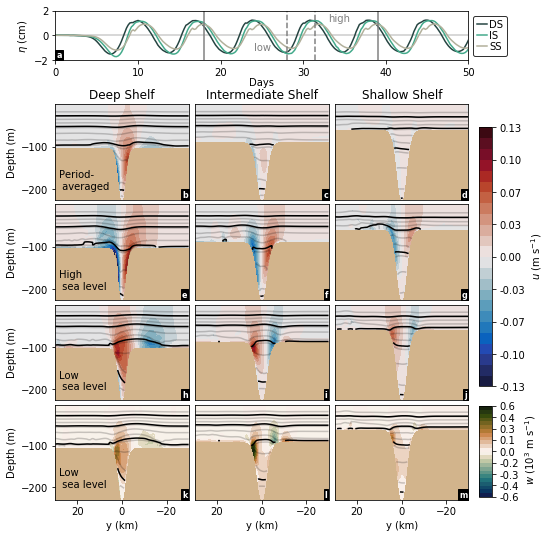

In [4]:
fig = plt.figure(figsize=(7.4,9))
gs = GridSpec(2,1, height_ratios=[0.5,4], hspace=0.2)
gs1 = gspec.GridSpecFromSubplotSpec(4,3,subplot_spec=gs[1],
                                        hspace=0.05,wspace=0.05)

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs1[0,0])
ax2 = fig.add_subplot(gs1[0,1])
ax3 = fig.add_subplot(gs1[0,2])
ax4 = fig.add_subplot(gs1[1,0])
ax5 = fig.add_subplot(gs1[1,1])
ax6 = fig.add_subplot(gs1[1,2])
ax7 = fig.add_subplot(gs1[2,0])
ax8 = fig.add_subplot(gs1[2,1])
ax9 = fig.add_subplot(gs1[2,2])
ax10 = fig.add_subplot(gs1[3,0])
ax11 = fig.add_subplot(gs1[3,1])
ax12 = fig.add_subplot(gs1[3,2])

axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
axs_w = [ax10,ax11,ax12]

for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]:
    ax.set_xticks([])
for ax in [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12]:
    ax.set_yticks([])
for ax in [ax10,ax11,ax12]:
    ax.set_xlabel('y (km)')
for ax in [ax1,ax4,ax7,ax10]:
    ax.set_ylabel('Depth (m)')

ax1.set_title('Deep Shelf')
ax2.set_title('Intermediate Shelf')
ax3.set_title('Shallow Shelf')

ax0.tick_params(axis='y')
ax0.axhline(0, color='0.8')
ax0.set_ylabel(r'$\eta$ (cm)')
ax0.set_xlabel('Days', labelpad=0)
ax0.set_xlim(0,50)
   
v_min = -0.13
v_max = 0.13

for run, col, (ax_avg, ax_high, ax_low), ax_w in zip(runs, colors, ((ax1,ax4,ax7),
                                                                    (ax2,ax5,ax8),
                                                                    (ax3,ax6,ax9)),axs_w):
    
    file = '/Volumes/MOBY/ROMS-CTW/ocean_his_ctw_CR_'+run+'_7d.nc'
    ds = xr.open_dataset(file, decode_times=False)

    # Plot ssh
    time = ds.ocean_time[:]/(3600*24)
    ax0.plot(time[:], ds.zeta[:,y_axis, x2]*100, color=col, label=run)
    ax0.set_ylim(-2,2)
  
    # Plot low
    y = ds.y_rho[y1+1:y2,x1].data
    z = ds.z_rho[t_low,:,y1+1:y2,x1].data
    rho = ds.rho[t_low,:,y1+1:y2,x1].data
    u = ds.u[t_low,:,y1+1:y2,x1].data
    ax_low, pc = plot_v_AS(ax_low, z, y, u, v_min=v_min, v_max=v_max)
    ax_low, cn = plot_rho_AS(ax_low, z, y, rho)
    ax_low.invert_xaxis()
   
    # Plot low vertical vel
    y = ds.y_rho[y1+1:y2,x1].data
    z_w = ds.z_w[t_low,:,y1+1:y2,x1].data
    z = ds.z_rho[t_low,:,y1+1:y2,x1].data
    rho = ds.rho[t_low,:,y1+1:y2,x1].data
    w = ds.w[t_low,:,y1+1:y2,x1].data
    ax_w, pc = plot_v_AS(ax_w, z_w, y, w*1000, v_min=-0.6, v_max=0.6, cmap=cmo.cm.tarn_r)
    ax_w, cn = plot_rho_AS(ax_w, z, y, rho)
    ax_w.invert_xaxis()
   
    # Plot high
    y = ds.y_rho[y1+1:y2,x1].data
    z = ds.z_rho[t_high,:,y1+1:y2,x1].data
    rho = ds.rho[t_high,:,y1+1:y2,x1].data
    u = ds.u[t_high,:,y1+1:y2,x1].data
    ax_high, pc = plot_v_AS(ax_high, z, y, u, v_min=v_min, v_max=v_max)
    ax_high, cn = plot_rho_AS(ax_high, z, y, rho)
    ax_high.invert_xaxis()
     
    # Plot avg
    u = ds.u[t1:t2,:,y1+1:y2,x1].data
    
    z_avg = np.squeeze(np.mean(ds.z_rho[t1:t2,:,y1+1:y2,x1].data, axis=0))
    rho_avg = np.squeeze(np.mean(ds.rho[t1:t2,:,y1+1:y2,x1].data, axis=0))
    u_avg = np.squeeze(np.mean(ds.u[t1:t2,:,y1+1:y2,x1].data, axis=0))
    
    ax_avg, pc = plot_v_AS(ax_avg, z_avg, y, u_avg, v_min=v_min, v_max=v_max)
    ax_avg, cn = plot_rho_AS(ax_avg, z_avg, y, rho_avg)
    ax_avg.invert_xaxis()
   
cmap = cmo.cm.balance
norm = mpl.colors.BoundaryNorm(np.linspace(v_min,v_max,25), cmap.N)
cbar_ax = fig.add_axes([0.92, 0.3, 0.025, 0.4])
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical', format='%1.2f', 
                                label=r' $u$ (m s$^{-1})$')
cmap2 = cmo.cm.tarn_r
norm2 = mpl.colors.BoundaryNorm(np.linspace(-0.6,0.6,25), cmap.N)
cbar_ax2 = fig.add_axes([0.92, 0.13, 0.025, 0.14])
cb2 = mpl.colorbar.ColorbarBase(cbar_ax2, cmap=cmap2,
                                norm=norm2,
                                orientation='vertical', format='%1.1f', 
                                label=r' $w$ ($10^3$ m s$^{-1}$)')

ax1.text(28,-200.0,'Period- \n averaged', color='k')
ax4.text(28,-200.0,'High \n sea level', color='k')
ax7.text(28,-200.0,'Low \n sea level', color='k')
ax10.text(28,-200.0,'Low \n sea level', color='k')
ax0.text(33,1.1,'high', color='0.5')
ax0.text(24,-1.2,'low', color='0.5')

ax0.text(0.002,0.05,'a',transform=ax0.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax1.text(0.95,0.03,'b',transform=ax1.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax2.text(0.96,0.03,'c',transform=ax2.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax3.text(0.95,0.03,'d',transform=ax3.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax4.text(0.95,0.03,'e',transform=ax4.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax5.text(0.97,0.03,'f',transform=ax5.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax6.text(0.95,0.03,'g',transform=ax6.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax7.text(0.95,0.03,'h',transform=ax7.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax8.text(0.97,0.03,'i',transform=ax8.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax9.text(0.97,0.03,'j',transform=ax9.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax10.text(0.95,0.03,'k',transform=ax10.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax11.text(0.97,0.03,'l',transform=ax11.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax12.text(0.93,0.03,'m',transform=ax12.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})


ax0.axvline(time[t_low], linestyle='--', color='0.5')
ax0.axvline(time[t_high], linestyle='--', color='0.5')
ax0.axvline(time[t1], color='0.5')
ax0.axvline(time[t2], color='0.5')

ax0.legend(labelspacing=0.1, ncol=1, bbox_to_anchor=(1,1), edgecolor='k',
           handlelength=1, handletextpad=0.2)    

plt.savefig('Figure3.png',format='png',bbox_inches='tight', dpi=300)
plt.show()